In [1]:
from TrainingFunctions import loss_fn
from TransformerModules import Transformer, PTC
from TransformerModules1 import Transformer1
from Preconditioner import transformer, ptc
from Operators import d_wc
from GMRES import gmres
import torch.nn as nn
from BasicFunctions import *

> Probe

In [2]:
x_rand = torch.rand(1, *LATTICE, GAUGE_DOF, 4, dtype=torch.complex128)

In [ ]:
x_rand

In [15]:
torch.mean(torch.abs(x_rand))

tensor(0.7711, dtype=torch.float64)

In [4]:
test = M(x_rand)

Values Mean:  tensor(1.4371, dtype=torch.float64, grad_fn=<MeanBackward0>)
SA mean:  tensor(0.0757, dtype=torch.float64, grad_fn=<MeanBackward0>)


> What does my Transformer with a field ???

In [7]:
M(x_one)

tensor([[[[[[[nan+nanj, nan+nanj, nan+nanj, nan+nanj],
             [nan+nanj, nan+nanj, nan+nanj, nan+nanj],
             [nan+nanj, nan+nanj, nan+nanj, nan+nanj]],

            [[nan+nanj, nan+nanj, nan+nanj, nan+nanj],
             [nan+nanj, nan+nanj, nan+nanj, nan+nanj],
             [nan+nanj, nan+nanj, nan+nanj, nan+nanj]],

            [[nan+nanj, nan+nanj, nan+nanj, nan+nanj],
             [nan+nanj, nan+nanj, nan+nanj, nan+nanj],
             [nan+nanj, nan+nanj, nan+nanj, nan+nanj]],

            ...,

            [[nan+nanj, nan+nanj, nan+nanj, nan+nanj],
             [nan+nanj, nan+nanj, nan+nanj, nan+nanj],
             [nan+nanj, nan+nanj, nan+nanj, nan+nanj]],

            [[nan+nanj, nan+nanj, nan+nanj, nan+nanj],
             [nan+nanj, nan+nanj, nan+nanj, nan+nanj],
             [nan+nanj, nan+nanj, nan+nanj, nan+nanj]],

            [[nan+nanj, nan+nanj, nan+nanj, nan+nanj],
             [nan+nanj, nan+nanj, nan+nanj, nan+nanj],
             [nan+nanj, nan+nanj, nan

In [37]:
M = ptc("PtcOnly")

In [8]:
M = transformer("Tr_gmres_4_16_True")

In [4]:
M = Transformer1(GAUGE_FIELD_SMALL, NON_GAUGE_DOF, 64)

In [6]:
M = Transformer(GAUGE_FIELD_SMALL, NON_GAUGE_DOF, 16, True)

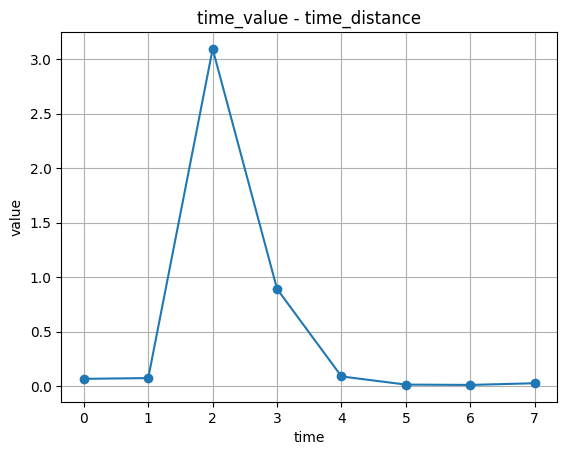

In [16]:
import matplotlib.pyplot as plt

x_one = torch.zeros(1, *LATTICE, GAUGE_DOF, NON_GAUGE_DOF, dtype=torch.complex128)
one = torch.ones(GAUGE_DOF, NON_GAUGE_DOF)
x_one[0, 1, 2, 1, 2] = one

x_out = M(x_one)
time_values = []
for k in range(x_out.shape[4]):
    time_values.append(torch.sum(torch.abs(x_out[0,1,2,1,k]), dim=(-2,-1)).item())
time_spots = list(range(x_out.shape[4]))

plt.plot(time_spots, time_values, "o-")
plt.xlabel('time')
plt.ylabel('value')
plt.title("time_value - time_distance")
plt.grid(True)
plt.show()

> Mean after SA

In [9]:
# Best so far
print(torch.mean(x_rand))
print("\ngmres, 0, 2:\n")
M = transformer("Tr_gmres_4_32_1_128_0_2")
M.give_self_attention(x_one)

tensor(0.4958+0.4995j, dtype=torch.complex128)

gmres, 0, 2:

tensor(-0.0789-0.1049j, dtype=torch.complex128, grad_fn=<MeanBackward0>)


> Stop Condition research